---
# Solução Exercício Publicidade regressão linear (advertising.csv)
---
**Machine Learning em Projetos (Erick Muzart e Fernando Melo)**



# Introdução
### Tópicos:  
- pair plot
- train_test_split
- feature selection


### Treinamento supervisionado
#### Modelo de regressão, pois a variável dependente é CONTÍNUA.

**Introdução:**  
Dados de publicidade de 200 filiais de uma determinada empresa.   
Cada linha representa os gastos de uma determinada filial em milhares de dólares com TV, Rádio e jornal e o total de vendas (em milhares de unidades).   
 
   
**Objetivo do caderno:**  
Criar modelo de regressão linear para prever o total de itens vendidos, com base na publicidade em TV, rádio e jornais.  
  
**Fonte de dados:**  
Advertising.csv  
http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv'   (Link desativado...)   
Link alternativo:   
"!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SeHggoq__tUYdoZ-wYbr11yDmEgrkqAJ' -O Advertising.csv"   
Esses dados fornecem as vendas de um produto (em milhares de unidades) com orçamentos de publicidade (em milhares de
dólares) de TV, rádio e jornal.     
Existem 200 observações (representadas pelas linhas) e cada observação é um mercado único.  
  
**Autor:**  Fernando Melo  
**Data:**  20/10/2020


# Carregar bibliotecas de código

In [1]:
# Carregar bibliotecas que serão utilizadas: (pandas, numpy, )
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

# importa o modelo de regressão linear
from sklearn.linear_model import LinearRegression

# biblioteca para gráficos
import seaborn as sns

# permitir que gráficos possam ser impressos dentro do caderno jupyter.
%matplotlib inline


# Análise exploratória do dados

In [2]:
# Baixar o arquivo da web
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SeHggoq__tUYdoZ-wYbr11yDmEgrkqAJ' -O Advertising.csv
# Link pro arquivo: https://drive.google.com/file/d/1SeHggoq__tUYdoZ-wYbr11yDmEgrkqAJ/view?usp=sharing


'wget' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'id' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [3]:
# Ler dados
df = pd.read_csv('Advertising.csv', index_col=0)
# Mostrar dimensões e primeiras linhas do dataset
print(df.shape)
df.head()

(200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# Mostrar dimensões e últimas linhas do dataset
print(df.shape)
df.tail()

(200, 4)


,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
# Mostra estatística básica das 'features'
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


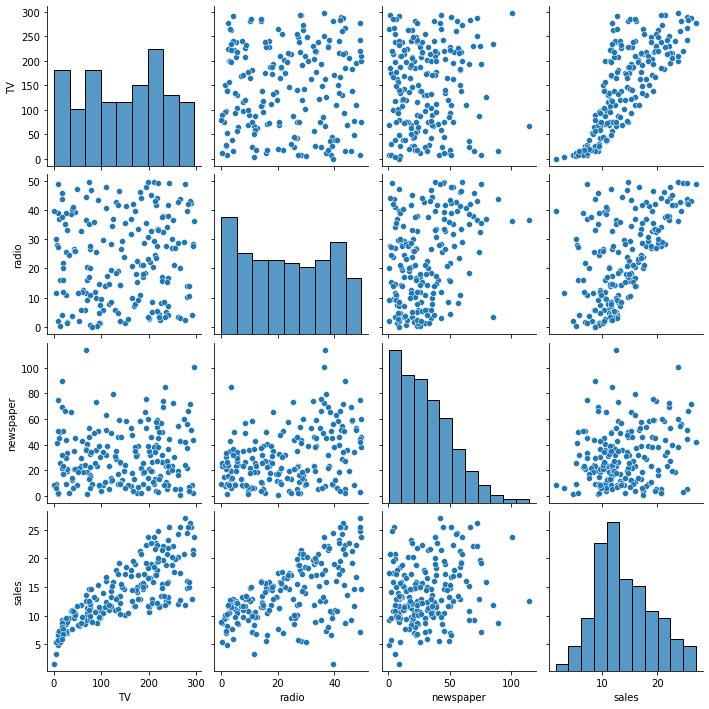

In [6]:
sns.pairplot(df);

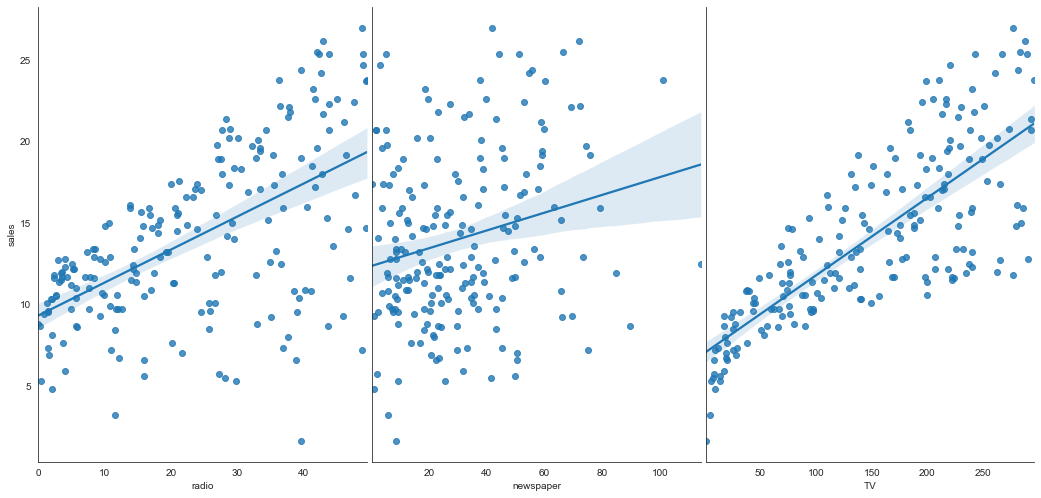

In [7]:
# Apresentar gráfico mostrando as relações entre as variáveis independentes e a dependente (vendas).
sns.set_style("white")
sns.pairplot(df, x_vars=['radio','newspaper','TV'], y_vars='sales',
             height=7, aspect=0.7, kind='reg');

### Forma de regressão linear

$ y = \ beta_0 + \ beta_1x_1 + \ beta_2x_2 + ... + \ beta_nx_n $

- $ y $ é a resposta
- $ \ beta_0 $ é a interceptação
- $ \ beta_1 $ é o coeficiente de $ x_1 $ (a primeira 'feature')
- $ \ beta_n $ é o coeficiente de $ x_n $ (a enésima 'feature')

Nesse caso:

$ y = \ beta_0 + \ beta_1 \ . TV + \ beta_2 \ . Radio + \ beta_3 \ . Jornal $

Os valores de $ \ beta $ são chamados de ** coeficientes do modelo **. Esses valores são "aprendidos" durante a etapa de ajuste do modelo usando o critério "mínimos quadrados". Em seguida, o modelo ajustado pode ser usado para fazer previsões!

# Preparação dos dados
O scikit-learn espera que X (matriz de 'features') e y (vetor de resposta) sejam matrizes NumPy.
No entanto, o Pandas é construído sobre o NumPy.
Assim, X pode ser um Pandas DataFrame e y pode ser uma série do Pandas.

In [8]:
# atribui os valores das variáveis independentes a 'X'
# cria uma lista contendo nomes das features
feature_cols = ['TV', 'radio', 'newspaper']
# usa a lista e atribui a X um subset do dataframe
X = df[feature_cols]

# select a Series from the DataFrame
y = df['sales']

print('X = ', X.shape)
print('y = ', y.shape)

X =  (200, 3)
y =  (200,)


In [9]:
# Divide o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [10]:
# Confere as dimensões dos datasets de treino e teste
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


# Treinar o modelo

In [11]:
# instancia modelo de regressão linear
reg_lin = LinearRegression()

# treina o modelo (aprende os coeficientes)
reg_lin.fit(X_train, y_train)

# Fazer a predição para os dados do dataset de teste
y_pred = reg_lin.predict(X_test)

# Cálculo do RMSE usando o scikit-learn
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  1.78159966153345


# Interpretação dos coeficientes

In [12]:
# Mostra 
print(reg_lin.intercept_)
print(reg_lin.coef_)

2.979067338122629
[0.04472952 0.18919505 0.00276111]


In [13]:
# Mostra lista de nome de features e seus coeficientes 
list(zip(feature_cols, reg_lin.coef_))

[('TV', 0.044729517468716326),
 ('radio', 0.18919505423437652),
 ('newspaper', 0.0027611143413671935)]

Como interpretamos o coeficiente de TV (0.0455)?

- Para uma determinada quantidade de gastos com anúncios em rádio e jornal,  US $ 1.000 adicionais gastos em anúncios de TV  resulta em um  aumento nas vendas de 45.5 itens.


# Testar o modelo (inferência)

In [14]:
# Fazer a predição para os dados do dataset de teste
y_pred = reg_lin.predict(X_test)

In [15]:
# mostrar resultado da predição
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

## Avaliar qualidade do modelo
RMSE (root mean square error): é a métrica que calcula "a raiz quadrática média" dos erros entre valores observados (reais) e as predições do modelo treinado.   
Quanto menor for o RMSE, melhor.   
Ao comparar vários modelos, o melhor modelo será aquele que tiver o menor RMSE.


In [16]:
# Cálculo do RMSE usando o scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.78159966153345


Temos um total de 3 variáveis independentes (preditivas): TV, rádio e jornais.  
Será que todas são importantes para fazer a melhor predição do total de vendas?  
E se tirássemos a variável 'newspaper' ?


In [17]:
# cria uma lista contendo nomes das features, desta vez sem 'newspaper'
feature_cols = ['TV', 'radio']
# usa a lista e atribui a X um subset do dataframe
X = df[feature_cols]

# select a Series from the DataFrame
y = df['sales']

# Divide o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.2)

# treina o modelo (aprende os coeficientes)
reg_lin.fit(X_train, y_train)

# Fazer a predição para os dados do dataset de teste
y_pred = reg_lin.predict(X_test)

# Cálculo do RMSE usando o scikit-learn
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  1.7714254173033517


In [18]:
# Cálculo do R-quadrado (R-squared) usando o scikit-learn
from sklearn.metrics import r2_score
y_true = y_test
y_pred = reg_lin.predict(X_test)
r2_score(y_true, y_pred)

0.9005833101920356

R-quadrado = percentual da variância de y que é explicada pelas variáveis preditoras do modelo de regressão.

### Acabamos de verificar que o erro diminuiu ao eliminarmos a variável 'newspaper'.

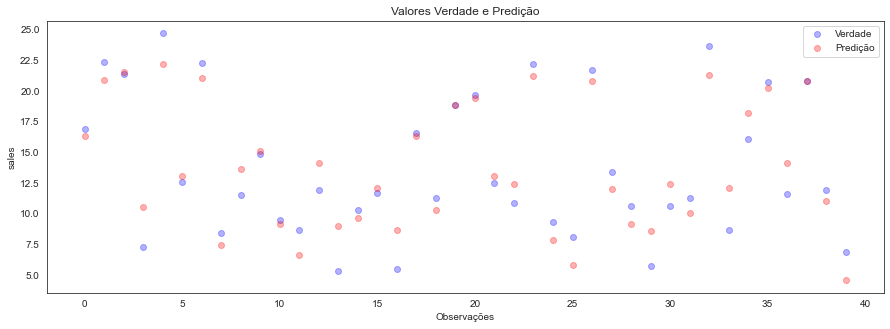

In [19]:
# Como podemos visualizar os resíduos das predições
import matplotlib.pyplot as plt
# Plotar gráfico dispersão sales x Observações, com os valores das 40 amostras de teste e valores reais.
plt.figure(figsize=(15,5))
plt.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Verdade', alpha = 0.3)
# Plotar no mesmo gráfico dispersão sales x Observações, com os valores das predições para as 40 amostras de teste
plt.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predição', alpha = 0.3)
# Mostrar título, e eixos X e Y
plt.title('Valores Verdade e Predição')
plt.xlabel('Observações')
plt.ylabel('sales')
plt.legend()
plt.show()

In [20]:
# Criar dataframe com y_test (verdade) e y_pred (predições)
df_result = pd.DataFrame(y_test)
df_result['predição'] = y_pred
df_result.columns=['verdade','predição']
# Mostrar as primeiras linhas para conferir com o gráfico acima.
df_result[:5]

,verdade,predição
96,16.9,16.357473
16,22.4,20.862994
31,21.4,21.525058
159,7.3,10.587198
129,24.7,22.224596


## Fazer normalização dos dados

### Normalização dos dados
Uma das formas de normalizar as variáveis independentes, é removendo de cada coluna, a sua respectiva média e dividindo pelo seu respectivo desvio padrão.  
Se uma feature tem um intervalo de valores que é ordens de magnitude maior que as outras features, ela pode dominar a função objetivo e tornar o modelo incapaz de aprender com outras features corretamente como esperado.  
A Normalização de um conjunto de dados é um requisito comum para muitos algoritmos de aprendizado de máquina: eles podem se comportar mal se os recursos individuais não se parecerem mais ou menos com dados normalmente distribuídos padrão (por exemplo, Gaussiano com média 0 e variação unitária).   
Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [21]:
# cria uma lista contendo nomes das features, desta vez sem 'newspaper'
feature_cols = ['TV', 'radio','newspaper']
# usa a lista e atribui a X um subset do dataframe
X = df[feature_cols]
# select a Series from the DataFrame
y = df['sales']
# Divide o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2)

In [22]:
# Mostra as primeiras linhas dos dados de treino (X_train)
X_train.head()

,TV,radio,newspaper
109,13.1,0.4,25.6
108,90.4,0.3,23.2
190,18.7,12.1,23.4
15,204.1,32.9,46.0
57,7.3,28.1,41.4


In [23]:
# Importa a biblioteca StandardScaler
from sklearn.preprocessing import StandardScaler
# Instancia objeto StandardScaler
scaler = StandardScaler()
# Ajusta o scaler aos dados de treino
scaler.fit(X_train)

StandardScaler()

In [24]:
# Cria um dataframe com os dados de treino transformados pelo scaler apenas para visualização da transformação
df_norm = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
df_norm.head()

,TV,radio,newspaper
0,-1.478614,-1.507409,-0.207096
1,-0.593912,-1.513991,-0.321291
2,-1.414522,-0.737311,-0.311775
3,0.707390,0.631752,0.763557
4,-1.544995,0.315814,0.544684


Treina modelo com dados normalizados

In [25]:
# instancia modelo de regressão linear
reg_lin_norm = LinearRegression()
# Instancia objeto StandarScaler
scaler = StandardScaler()
# Ajusta o scaler aos dados de treino
scaler.fit(X_train)
# treina o modelo (aprende os coeficientes)
reg_lin_norm.fit(scaler.transform(X_train), y_train)
# Fazer a predição para os dados do dataset de teste
y_pred = reg_lin_norm.predict(scaler.transform(X_test))
# Cálculo do RMSE usando o scikit-learn
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  1.4113417558581582


### A normalização dos dados melhorou o desempenho do modelo !
Linear Model 3 features (TV, radio, newspaper)     
dados não normalizados:   RMSE =  1.5819675315439037   
dados normalizados: RMSE =  1.4113417558581582   